# UFC Dataset analysis

## Exploaratory data analysis

In this section we'll perform some exploratory data analysis on the dataset. We'll look at important features, their distribution and other interesting patterns in the data.

In [96]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
stats = pd.read_csv("datasets/stats.csv", sep=";")
stats.head()

,red_fighter_name,blue_fighter_name,event_date,red_fighter_nickname,blue_fighter_nickname,red_fighter_result,blue_fighter_result,method,round,time,...,red_fighter_sig_str_body_pct,blue_fighter_sig_str_body_pct,red_fighter_sig_str_leg_pct,blue_fighter_sig_str_leg_pct,red_fighter_sig_str_distance_pct,blue_fighter_sig_str_distance_pct,red_fighter_sig_str_clinch_pct,blue_fighter_sig_str_clinch_pct,red_fighter_sig_str_ground_pct,blue_fighter_sig_str_ground_pct
0,ILIA TOPURIA,MAX HOLLOWAY,26/10/2024,El Matador,Blessed,W,L,KO/TKO,3,1:34,...,14,16,20,24,94,100,0,0,5,0
1,ROBERT WHITTAKER,KHAMZAT CHIMAEV,26/10/2024,The Reaper,Borz,L,W,Submission,1,3:34,...,0,33,100,0,100,0,0,0,0,100
2,MAGOMED ANKALAEV,ALEKSANDAR RAKIC,26/10/2024,-,Rocket,W,L,Decision - Unanimous,3,5:00,...,40,16,23,64,90,94,9,5,0,0
3,LERONE MURPHY,DAN IGE,26/10/2024,The Miracle,50K,W,L,Decision - Unanimous,3,5:00,...,23,10,7,13,71,69,23,13,5,17
4,SHARA MAGOMEDOV,ARMEN PETROSYAN,26/10/2024,Bullet,Superman,W,L,KO/TKO,2,4:52,...,44,12,18,58,96,97,3,2,0,0


In [70]:
# distinct values in stats bonus column
stats["bonus"].head()

0    belt
1    perf
2       -
3       -
4    perf
Name: bonus, dtype: object

In [71]:
stats.columns

Index(['red_fighter_name', 'blue_fighter_name', 'event_date',
       'red_fighter_nickname', 'blue_fighter_nickname', 'red_fighter_result',
       'blue_fighter_result', 'method', 'round', 'time', 'time_format',
       'referee', 'details', 'bout_type', 'bonus', 'event_name',
       'event_location', 'red_fighter_KD', 'blue_fighter_KD',
       'red_fighter_sig_str', 'blue_fighter_sig_str',
       'red_fighter_sig_str_pct', 'blue_fighter_sig_str_pct',
       'red_fighter_total_str', 'blue_fighter_total_str', 'red_fighter_TD',
       'blue_fighter_TD', 'red_fighter_TD_pct', 'blue_fighter_TD_pct',
       'red_fighter_sub_att', 'blue_fighter_sub_att', 'red_fighter_rev',
       'blue_fighter_rev', 'red_fighter_ctrl', 'blue_fighter_ctrl',
       'red_fighter_sig_str_head', 'blue_fighter_sig_str_head',
       'red_fighter_sig_str_body', 'blue_fighter_sig_str_body',
       'red_fighter_sig_str_leg', 'blue_fighter_sig_str_leg',
       'red_fighter_sig_str_distance', 'blue_fighter_sig_str_distan

### Fight time and rounds

Firstly, we can focus on the fight time and number of rounds. 

In [72]:
# filter stats to only contain fights after 1999
stats["event_date"] = pd.to_datetime(stats["event_date"])
stats_after_1999 = stats[stats["event_date"].dt.year > 1999]

# create a fight_night dataframe from stats where the 'bout_type' contains "UFC Fight Night"
fight_night = stats_after_1999[stats_after_1999["bout_type"].str.contains("UFC Fight Night")]
# create a column "fight_lenght" 
fight_night["fight_lenght"] = fight_night["time"].apply(lambda x: int(x.split(":")[0])*60 + int(x.split(":")[1]))


# create a numbered event dataframe from stats where the 'bout_type' contains a number
numbered_event = stats_after_1999[stats_after_1999["bout_type"].str.contains("\d")]
numbered_event["fight_lenght"] = numbered_event["time"].apply(lambda x: int(x.split(":")[0])*60 + int(x.split(":")[1]))

/var/folders/8f/r3_wj0mj7j7589tsdf6vxc2w0000gn/T/ipykernel_20125/3764195426.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  stats["event_date"] = pd.to_datetime(stats["event_date"])
/var/folders/8f/r3_wj0mj7j7589tsdf6vxc2w0000gn/T/ipykernel_20125/3764195426.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numbered_event["fight_lenght"] = numbered_event["time"].apply(lambda x: int(x.split(":")[0])*60 + int(x.split(":")[1]))


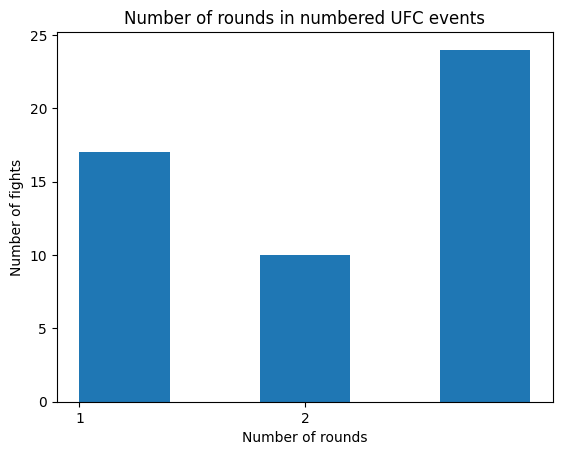

In [73]:
# make a histogram of "round" column in numbered_event
plt.hist(numbered_event["round"], bins=5)
plt.xlabel("Number of rounds")
plt.xticks(np.arange(1, 3, 1))
plt.ylabel("Number of fights")
plt.title("Number of rounds in numbered UFC events")
plt.show()

In [74]:
stats_after_1999["bout_type"].unique()

array(['UFC Featherweight Title Bout', 'Middleweight Bout',
       'Light Heavyweight Bout', 'Featherweight Bout',
       'Welterweight Bout', 'Catch Weight Bout', 'Heavyweight Bout',
       'Bantamweight Bout', 'Flyweight Bout', "Women's Bantamweight Bout",
       "Women's Strawweight Bout", 'Lightweight Bout',
       'UFC Light Heavyweight Title Bout',
       "UFC Women's Bantamweight Title Bout",
       'UFC Bantamweight Title Bout', "UFC Women's Flyweight Title Bout",
       "Women's Flyweight Bout", 'UFC Middleweight Title Bout',
       'UFC Welterweight Title Bout',
       'UFC Interim Heavyweight Title Bout', 'UFC Lightweight Title Bout',
       'UFC Flyweight Title Bout', "UFC Women's Strawweight Title Bout",
       "Women's Featherweight Bout", 'UFC Heavyweight Title Bout',
       'UFC Interim Featherweight Title Bout',
       'Road To UFC 1 Lightweight Tournament Title Bout',
       'Road To UFC 1 Featherweight Tournament Title Bout',
       'Road To UFC 1 Bantamweight Tourna

In [75]:
numbered_event["round"].value_counts()

round
3    24
1    17
2    10
Name: count, dtype: int64

/Users/lucijaaleksic/anaconda3/envs/torch/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


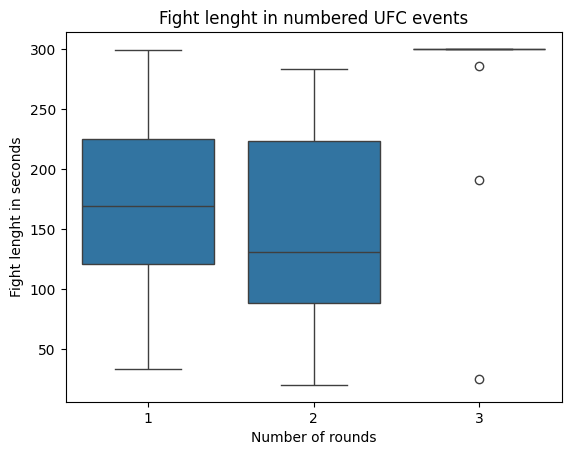

In [76]:
# show distribution of fight lenght in numbered_event by three boxplots and color the data points by round
sns.boxplot(x="round", y="fight_lenght", data=numbered_event)
plt.xlabel("Number of rounds")
plt.ylabel("Fight lenght in seconds")
plt.title("Fight lenght in numbered UFC events")
plt.show()


/Users/lucijaaleksic/anaconda3/envs/torch/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


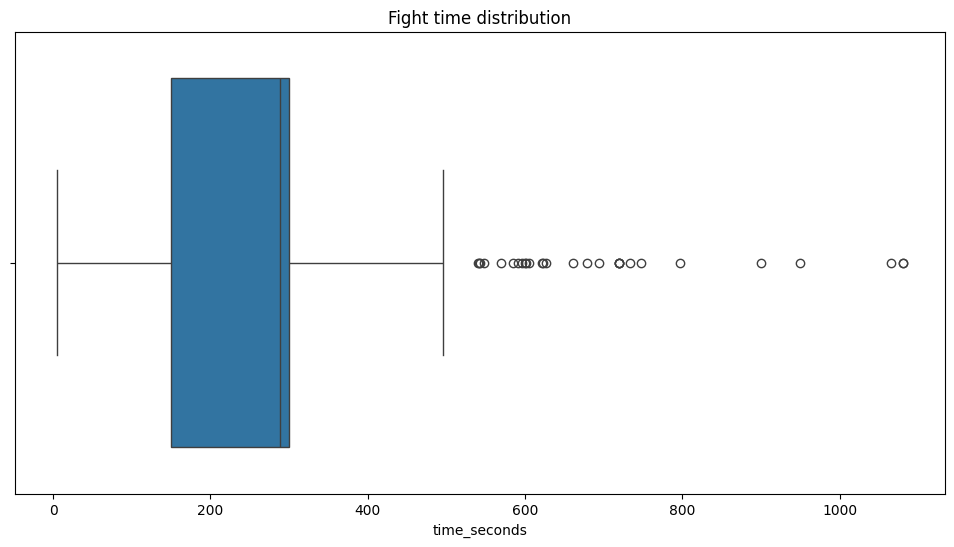

In [77]:
# add columnt time_seconds to stats - from min:sec to seconds
stats["time_seconds"] = stats["time"].apply(lambda x: int(x.split(":")[0])*60 + int(x.split(":")[1]))

plt.figure(figsize=(12, 6))
sns.boxplot(x="time_seconds", data=stats)
plt.title("Fight time distribution")
plt.show()

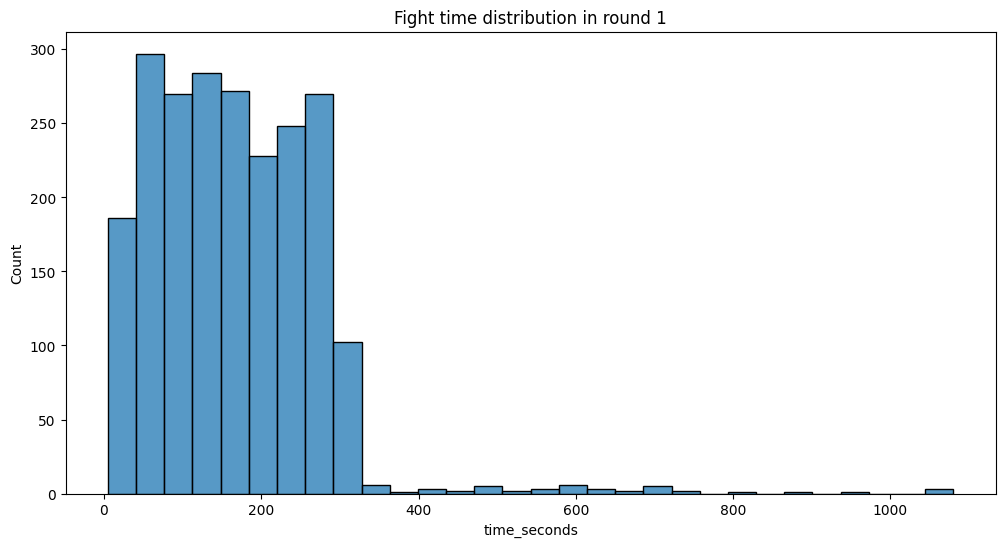

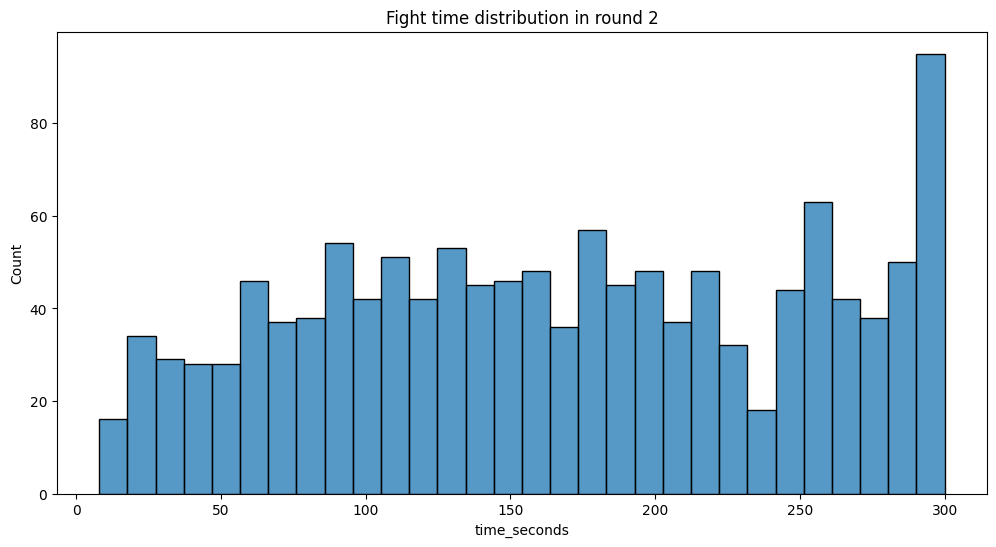

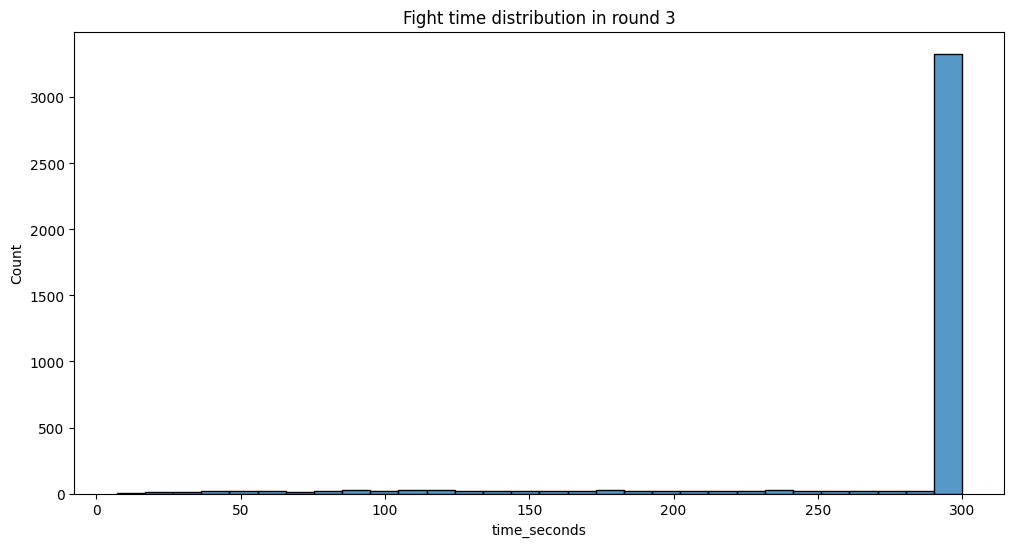

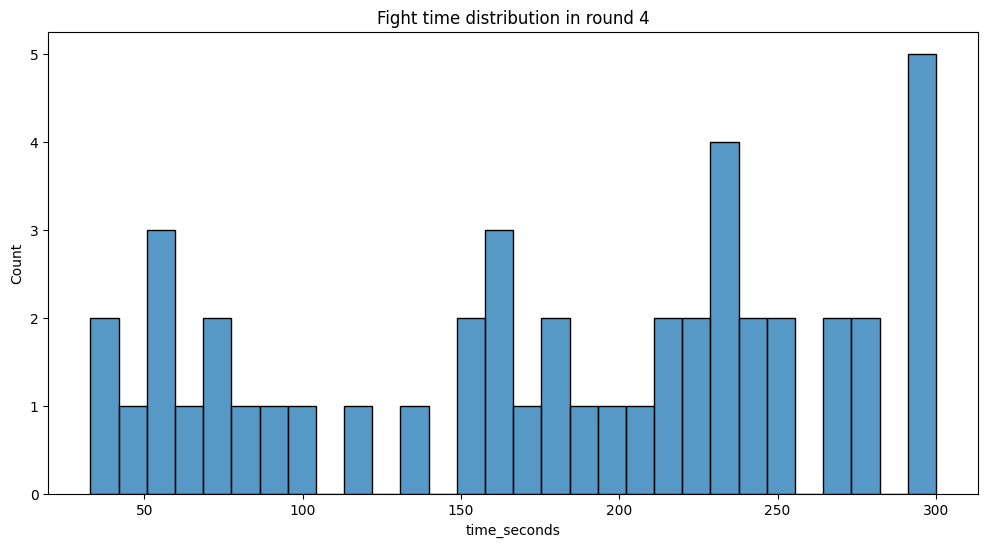

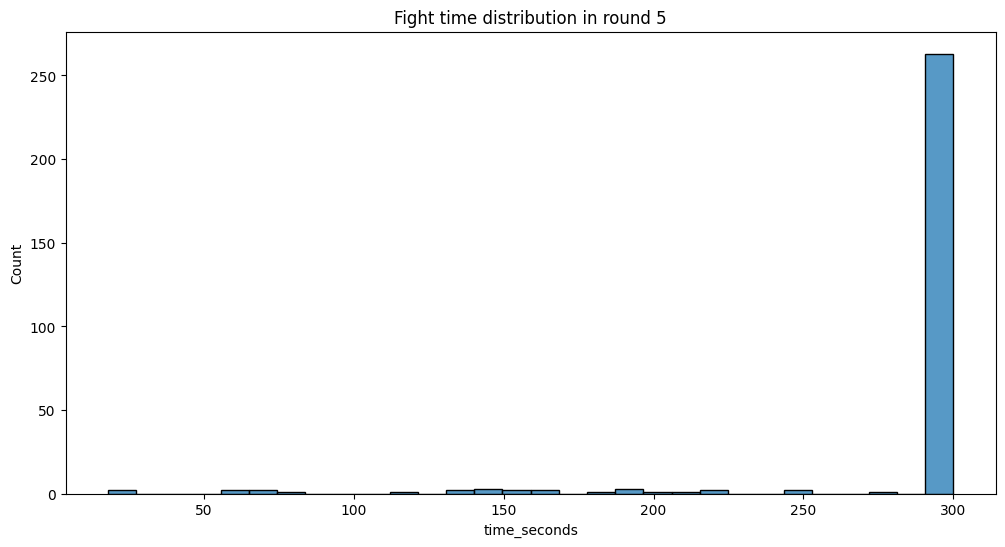

In [78]:
# plot fight time distribution per rounds 
for i in range(1, 6):
    plt.figure(figsize=(12, 6))
    sns.histplot(stats[stats["round"] == i]["time_seconds"], bins=30)
    plt.title(f"Fight time distribution in round {i}")
    plt.show()

In [95]:
# which is the longest fight?
stats[stats["time_seconds"] == stats["time_seconds"].max()]

,red_fighter_name,blue_fighter_name,event_date,red_fighter_nickname,blue_fighter_nickname,red_fighter_result,blue_fighter_result,method,round,time,...,blue_fighter_sig_str_leg_pct,red_fighter_sig_str_distance_pct,blue_fighter_sig_str_distance_pct,red_fighter_sig_str_clinch_pct,blue_fighter_sig_str_clinch_pct,red_fighter_sig_str_ground_pct,blue_fighter_sig_str_ground_pct,time_seconds,city,country
7686,OLEG TAKTAROV,MARCO RUAS,1995-12-16,The Russian Bear,King of the Streets,W,L,Decision - Unanimous,1,18:00,...,78,100,100,0,0,0,0,1080,Denver,Colorado
7687,DAN SEVERN,DAVID ABBOTT,1995-12-16,The Beast,Tank,W,L,Decision - Unanimous,1,18:00,...,0,0,0,8,66,91,33,1080,Denver,Colorado


The longest fights are two 18 minute fights which are both from 1995 when the UFC was still in its early days and there were no rounds.

### Fight location

Here we can focus on where the fights are taking place. We'll look into cities and countries.

In [81]:
stats["event_location"].unique()

array(['Abu Dhabi, Abu Dhabi, United Arab Emirates',
       'Las Vegas, Nevada, USA', 'Salt Lake City, Utah, USA',
       'Paris, Ile-de-France, France',
       'Perth, Western Australia, Australia',
       'Manchester, England, United Kingdom', 'Denver, Colorado, USA',
       'Riyadh, Riyadh, Saudi Arabia', 'Louisville, Kentucky, USA',
       'Newark, New Jersey, USA', 'St. Louis, Missouri, USA',
       'Rio de Janeiro, Rio de Janeiro, Brazil',
       'Atlantic City, New Jersey, USA', 'Miami, Florida, USA',
       'Mexico City, Distrito Federal, Mexico',
       'Anaheim, California, USA', 'Toronto, Ontario, Canada',
       'Austin, Texas, USA', 'New York City, New York, USA',
       'Sao Paulo, Sao Paulo, Brazil',
       'Sydney, New South Wales, Australia', 'Kallang, Singapore',
       'Boston, Massachusetts, USA', 'Nashville, Tennessee, USA',
       'London, England, United Kingdom', 'Jacksonville, Florida, USA',
       'Vancouver, British Columbia, Canada',
       'Charlotte, North

In [82]:
# split location to city and country
stats["city"] = stats["event_location"].apply(lambda x: x.split(",")[0])
stats["country"] = stats["event_location"].apply(lambda x: x.split(",")[1]) # in usa it's state

In [83]:
# most common cities
stats["city"].value_counts().head(10)

city
Las Vegas         2609
Abu Dhabi          233
London             166
Rio de Janeiro     146
Newark             112
Anaheim            105
Houston            103
Sao Paulo           99
Atlantic City       91
Toronto             86
Name: count, dtype: int64

In [84]:
# most common countries
stats["country"].value_counts().head(10)

country
Nevada        2609
California     353
Texas          292
England        275
Florida        249
New Jersey     223
Abu Dhabi      216
New York       201
Ontario        111
Colorado       110
Name: count, dtype: int64

### Fighters

Now we can focus on the fighters. We can look at the number of fights they have, their win rate, and other interesting statistics.

In [85]:
# transform the stats dataset to have one row per figher 
# - red_fighter_name and blue_fighter_name = fighter
# - red_fighter_result and blue_fighter_result = result
# - red_fighter_nickname and blue_fighter_nickname = nickname
# - keep event_date

fighters = pd.DataFrame()
fighters["fighter"] = pd.concat([stats["red_fighter_name"], stats["blue_fighter_name"]])
fighters["result"] = pd.concat([stats["red_fighter_result"], stats["blue_fighter_result"]])
fighters["nickname"] = pd.concat([stats["red_fighter_nickname"], stats["blue_fighter_nickname"]])
fighters["event_date"] = stats["event_date"].reset_index(drop=True)

fighters.head()

,fighter,result,nickname,event_date
0,ILIA TOPURIA,W,El Matador,2024-10-26
1,ROBERT WHITTAKER,L,The Reaper,2024-10-26
2,MAGOMED ANKALAEV,W,-,2024-10-26
3,LERONE MURPHY,W,The Miracle,2024-10-26
4,SHARA MAGOMEDOV,W,Bullet,2024-10-26


In [86]:
# fighter with the most fights
fighters["fighter"].value_counts().head(10)

fighter
JIM MILLER          43
ANDREI ARLOVSKI     41
DONALD CERRONE      37
CLAY GUIDA          36
RAFAEL DOS ANJOS    36
JEREMY STEPHENS     33
DEMIAN MAIA         33
NEIL MAGNY          33
CHARLES OLIVEIRA    32
DIEGO SANCHEZ       32
Name: count, dtype: int64

In [87]:
# fighter with the most wins (result == "W")
fighters[fighters["result"] == "W"]["fighter"].value_counts().head(10)

fighter
JIM MILLER          26
DONALD CERRONE      23
ANDREI ARLOVSKI     23
NEIL MAGNY          22
DUSTIN POIRIER      22
CHARLES OLIVEIRA    22
MAX HOLLOWAY        22
DEMIAN MAIA         22
JON JONES           21
RAFAEL DOS ANJOS    21
Name: count, dtype: int64

In [88]:
# fighter with the most losses (result == "L")
fighters[fighters["result"] == "L"]["fighter"].value_counts().head(10)

fighter
JEREMY STEPHENS       18
ANDREI ARLOVSKI       18
CLAY GUIDA            18
JIM MILLER            17
RAFAEL DOS ANJOS      15
MICHAEL JOHNSON       15
DONALD CERRONE        14
ANGELA HILL           14
TIM MEANS             14
OVINCE SAINT PREUX    13
Name: count, dtype: int64

In [90]:
# fighter with the best win ratio
# fighters with more than 4 fights
fighters_5 = fighters["fighter"].value_counts()[fighters["fighter"].value_counts() > 5].index
fighters_5 = fighters[fighters["fighter"].isin(fighters_5)]

win_ratio = fighters_5.groupby("fighter")["result"].apply(lambda x: x[x == "W"].count() / x.count()).sort_values(ascending=False)

top_20_win_ratio = win_ratio.head(20)

for fighter, ratio in top_20_win_ratio.items():
    # count how many fights the fighter had
    fights = fighters[fighters["fighter"] == fighter]["result"].count()
    last_figth = fighters[fighters["fighter"] == fighter]["event_date"].max()
    print(f"{fighter} {ratio*100:.2f}% {fights} fights, last fight: {last_figth}")

UMAR NURMAGOMEDOV 100.00% 6 fights, last fight: 2024-08-03 00:00:00
JACK DELLA MADDALENA 100.00% 7 fights, last fight: 2024-03-09 00:00:00
NATALIA SILVA 100.00% 6 fights, last fight: 2024-09-07 00:00:00
CAIO BORRALHO 100.00% 7 fights, last fight: 2024-08-24 00:00:00
TATIANA SUAREZ 100.00% 7 fights, last fight: 2023-08-05 00:00:00
PADDY PIMBLETT 100.00% 6 fights, last fight: 2024-07-27 00:00:00
MANON FIOROT 100.00% 7 fights, last fight: 2024-03-30 00:00:00
LERONE MURPHY 100.00% 7 fights, last fight: 2024-10-26 00:00:00
KHAMZAT CHIMAEV 100.00% 8 fights, last fight: 2024-10-26 00:00:00
KHABIB NURMAGOMEDOV 100.00% 13 fights, last fight: 2020-10-24 00:00:00
MUHAMMAD MOKAEV 100.00% 7 fights, last fight: 2024-07-27 00:00:00
DRICUS DU PLESSIS 100.00% 8 fights, last fight: 2024-08-17 00:00:00
ZABIT MAGOMEDSHARIPOV 100.00% 6 fights, last fight: 2019-11-09 00:00:00
SHAVKAT RAKHMONOV 100.00% 6 fights, last fight: 2023-12-16 00:00:00
MOVSAR EVLOEV 100.00% 8 fights, last fight: 2024-01-20 00:00:00
I